## Mengimpor Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

In [2]:
file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')

## Trimming Audio (Memotong Audio)

### Membaca File Audio

In [10]:
with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    audio_content = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
    if n_channels > 1: # Apa yang terjadi jika baris 9 dan 10 dihilangkan?
        audio_data = audio_data.reshape(-1, n_channels)
    
print(f"Number of channels: {n_channels} | Sample width: {sampwidth} | Frame rate: {framerate} | Number of frames: {n_frames}")
print(f"Audio data shape: {audio_data.shape}")

Number of channels: 2 | Sample width: 2 | Frame rate: 44100 | Number of frames: 809508
Audio data shape: (809508, 2)


- **wave.open**: Membuka file audio untuk membaca (`'r'` mode).
- **Atribut**:
  - `n_channels`: Jumlah channel audio (misalnya, 1 untuk mono, 2 untuk stereo).
  - `sampwidth`: Lebar sampel dalam byte (misalnya, 2 byte untuk audio 16-bit).
  - `framerate`: Tingkat sampling, yang menunjukkan jumlah sampel per detik.
  - `n_frames`: Jumlah total frame (sampel) dalam file audio.
- **Membaca Frame**: `readframes(n_frames)` membaca semua frame dari file audio.
- **Mengubah ke array numpy**: `np.frombuffer(audio_content, dtype=np.int16)` mengubah data byte menjadi array numpy dari integer 16-bit.
- **Mereshape untuk multi-channel**: Jika audio memiliki lebih dari satu channel, data diubah menjadi array 2D di mana setiap kolom mewakili satu channel.

### Memotong File Audio

In [4]:
start_time = 2
end_time = 5

start_sample = int(start_time * framerate)
end_sample = int(end_time * framerate)
print(f"Start sample: {start_sample} | End sample: {end_sample}")
audio_data_trimmed = audio_data[start_sample:end_sample]

Start sample: 88200 | End sample: 220500


- **Print Informasi File**: Mencetak jumlah channel, lebar sampel, tingkat sampel, dan jumlah frame untuk file audio.
- **Waktu Trim**: Mendefinisikan waktu mulai dan akhir untuk trimming (2 detik hingga 5 detik).
- **Indeks Sampel**: Menghitung indeks sampel mulai dan akhir berdasarkan waktu mulai dan akhir.
  - `start_sample = int(start_time * framerate)`
  - `end_sample = int(end_time * framerate)`
- **Trim Data Audio**: Mengekstrak sampel dari `start_sample` hingga `end_sample` untuk mendapatkan segmen audio yang telah di-trim.

### Visualisasi

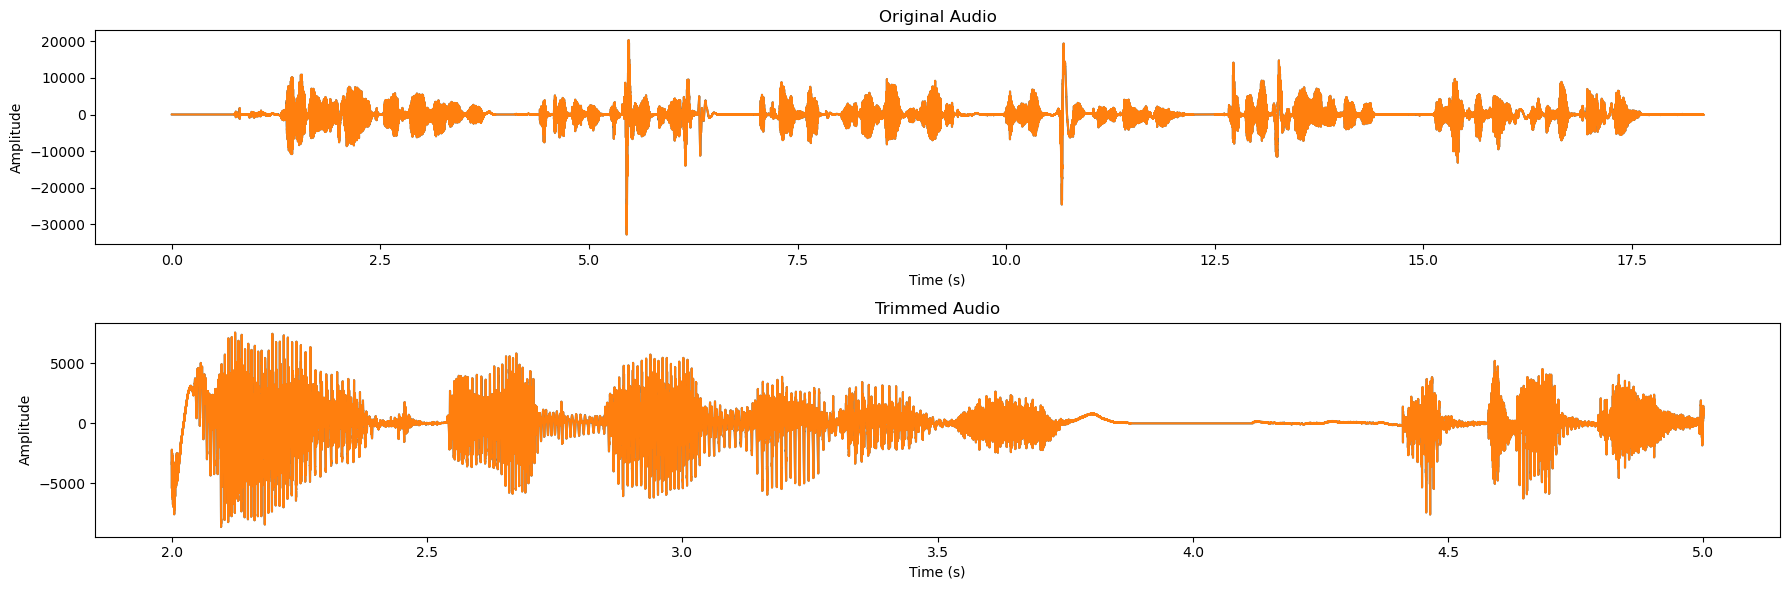

In [5]:
time_axis_original = np.linspace(0, len(audio_data) / framerate, num=len(audio_data))
time_axis_trimmed = np.linspace(start_time, end_time, num=len(audio_data_trimmed))

fig, ax = plt.subplots(2, 1, figsize=(18, 6))
ax[0].plot(time_axis_original, audio_data)
ax[0].set_title('Original Audio')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(time_axis_trimmed, audio_data_trimmed)
ax[1].set_title('Trimmed Audio')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

- **Sumbu Waktu**: Membuat sumbu waktu untuk data audio asli dan yang telah di-trim.
  - `np.linspace` menghasilkan nilai yang terdistribusi secara linear sepanjang interval yang ditentukan.
  - `time_axis_original`: Sumbu waktu untuk data audio asli.
  - `time_axis_trimmed`: Sumbu waktu untuk data audio yang telah di-trim.
- **Plotting**:
  - `fig, ax = plt.subplots(2, 1, figsize=(18, 6))`: Membuat figure dengan dua subplot.
  - **Plot Audio Asli**: Memplot gelombang audio asli.
    - `ax[0].plot(time_axis_original, audio_data if n_channels == 1 else audio_data[:, 0])`: Memplot channel pertama jika multi-channel.
  - **Plot Audio yang Telah Di-trim**: Memplot gelombang audio yang telah di-trim.
    - `ax[1].plot(time_axis_trimmed, audio_data_trimmed if n_channels == 1 else audio_data_trimmed[:, 0])`: Memplot channel pertama jika multi-channel.
  - Menambahkan judul, label, dan layout yang ketat untuk visualisasi yang lebih baik.

In [6]:
print(f"Audio Data Trimed Length: {len(audio_data_trimmed)} | Audio Data Length: {len(audio_data)}")

Audio Data Trimed Length: 132300 | Audio Data Length: 809508


### Menyimpan File Audio

In [7]:
# Save the trimmed audio
file_path_trimmed = os.path.join(os.getcwd(), 'output', 'harvard_trimmed.wav')

with wave.open(file_path_trimmed, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.setnframes(len(audio_data_trimmed))
    wav_file.writeframes(audio_data_trimmed.tobytes())

- **Path Output**: Menentukan path untuk file audio yang telah di-trim dan memastikan direktori output ada.
- **wave.open untuk Menulis**: Membuka file `.wav` baru untuk menulis (`'w'` mode).
- **Set Parameter Audio**: Menetapkan jumlah channel, lebar sampel, dan tingkat sampel untuk file baru agar sesuai dengan audio asli.
- **Menulis Frame**: Menulis data audio yang telah di-trim ke file baru.
  - `audio_data_trimmed.tobytes()`: Mengubah array numpy kembali ke byte sebelum menulis.

---
## Fading Technique

Sumber Wav: https://www2.cs.uic.edu/~i101/SoundFiles/ImperialMarch60.wav

### Mempersiapkan Audio

In [55]:
file_path = os.path.join(os.getcwd(), 'data', 'ImperialMarch60.wav')

with wave.open(file_path, 'r') as wav_file:
    n_channels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    audio_content = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(audio_content, dtype=np.int16)
    
    if n_channels > 1:
        audio_data = audio_data.reshape(-1, n_channels)

In [56]:
# trim audio_data from 0 to 30 karena bagian akhir audio memiliki amplitude yang kecil
start_time = 0
end_time = 30

start_sample = int(start_time * framerate)
end_sample = int(end_time * framerate)

audio_data = audio_data[start_sample:end_sample]

Pertama-tama kita baca dahulu file audio dengan `wave`. Dalam kasus ini, kita akan menggunakan lagu "Imperial March" dari Star Wars. Kita hanya menggunakan 30 detik pertama dari audio ini

### Menghitung Jumlah Sampel untuk Fade

In [57]:
# Set fade-in and fade-out durations
fade_in_duration = 10.0  # seconds
fade_out_duration = 10.0  # seconds

# Calculate the number of samples for fade-in and fade-out
fade_in_samples = int(fade_in_duration * framerate)
fade_out_samples = int(fade_out_duration * framerate)


- **fade_in_samples**: Menghitung jumlah sampel untuk efek fade-in dengan mengalikan durasi fade-in dengan laju frame.
- **fade_out_samples**: Menghitung jumlah sampel untuk efek fade-out dengan mengalikan durasi fade-out dengan laju frame.

### Membuat Kurva Fade Linier

In [ ]:

# Create linear fade-in and fade-out curves
fade_in_curve = np.linspace(0, 1, fade_in_samples)
fade_out_curve = np.linspace(1, 0, fade_out_samples)


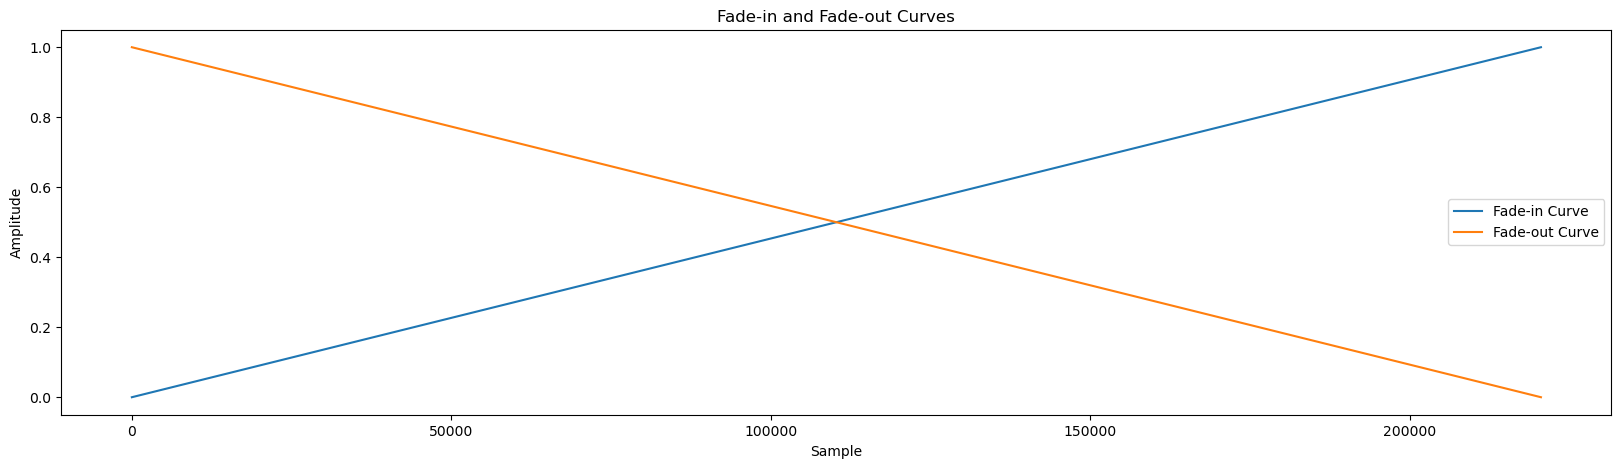

In [65]:
# visualize the fade-in and fade-out curves
plt.figure(figsize=(20, 5))
plt.plot(fade_in_curve, label='Fade-in Curve')
plt.plot(fade_out_curve, label='Fade-out Curve')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Fade-in and Fade-out Curves')
plt.legend()
plt.show()

- **np.linspace(0, 1, fade_in_samples)**: Menghasilkan array linier dari 0 hingga 1 dengan `fade_in_samples` elemen untuk efek fade-in.
- **np.linspace(1, 0, fade_out_samples)**: Menghasilkan array linier dari 1 hingga 0 dengan `fade_out_samples` elemen untuk efek fade-out.

### Menerapkan Fade-in

In [58]:
audio_data_copy = audio_data.copy()
audio_data_copy[:fade_in_samples] = audio_data_copy[:fade_in_samples] * fade_in_curve[:, np.newaxis] if n_channels > 1 else audio_data_copy[:fade_in_samples] * fade_in_curve
audio_data_copy[-fade_out_samples:] = audio_data_copy[-fade_out_samples:] * fade_out_curve[:, np.newaxis] if n_channels > 1 else audio_data_copy[-fade_out_samples:] * fade_out_curve


- **audio_data[:fade_in_samples]**: Memilih segmen awal data audio yang sama dengan jumlah sampel fade-in.
- **audio_data[:fade_in_samples] * fade_in_curve[:, np.newaxis]**: Mengalikan segmen yang dipilih dengan kurva fade-in. Bagian `[:, np.newaxis]` memastikan broadcasting yang benar untuk audio multi-channel.
- **if n_channels > 1 else audio_data[:fade_in_samples] * fade_in_curve**: Menerapkan efek fade-in secara berbeda tergantung pada apakah audio mono atau multi-channel.
- **audio_data[-fade_out_samples:]**: Memilih segmen akhir data audio yang sama dengan jumlah sampel fade-out.
- **audio_data[-fade_out_samples:] * fade_out_curve[:, np.newaxis]**: Mengalikan segmen yang dipilih dengan kurva fade-out. Bagian `[:, np.newaxis]` memastikan broadcasting yang benar untuk audio multi-channel.
- **if n_channels > 1 else audio_data[-fade_out_samples:] * fade_out_curve**: Menerapkan efek fade-out secara berbeda tergantung pada apakah audio mono atau multi-channel.

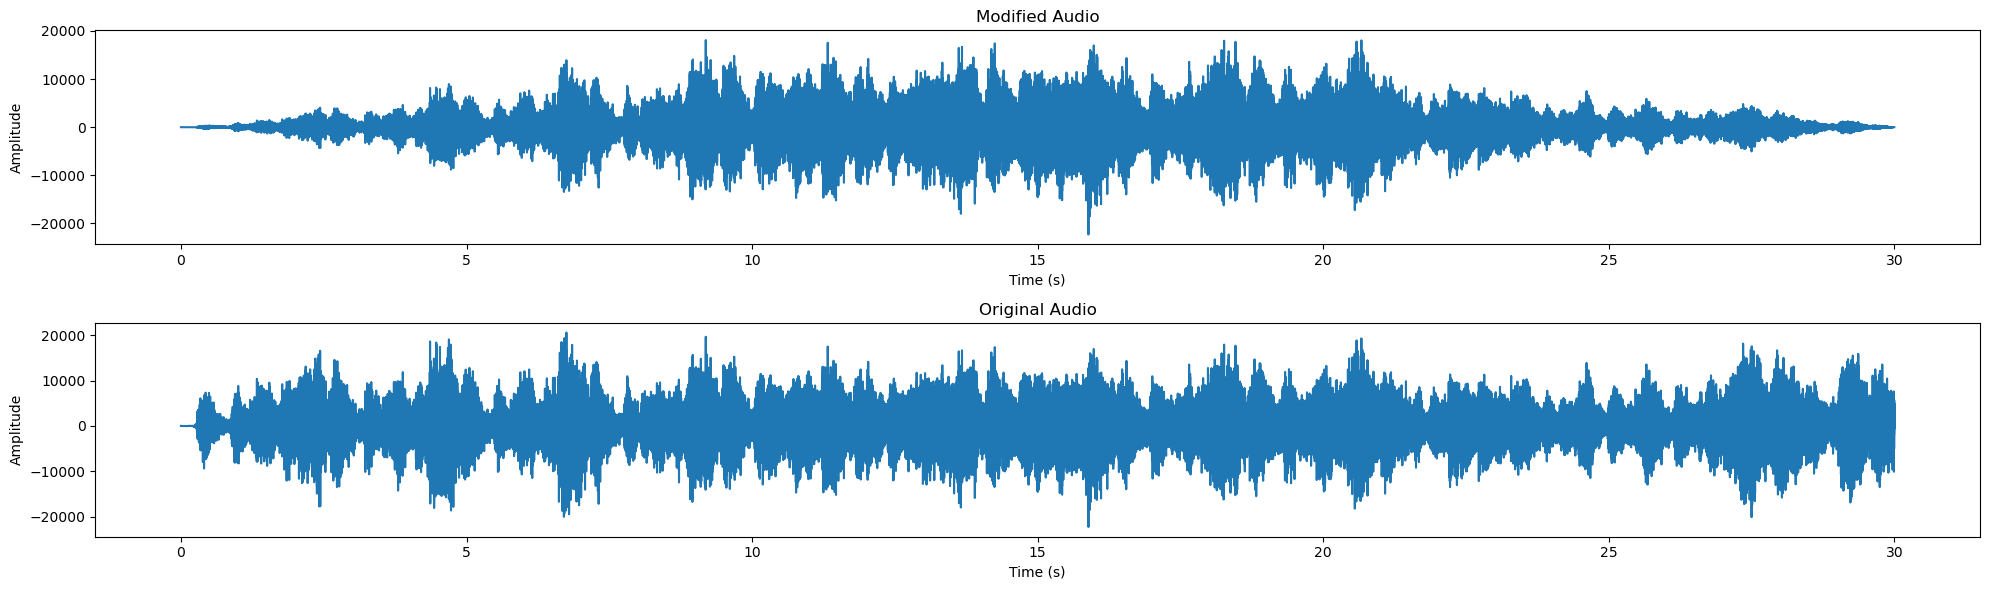

In [59]:
time_axis = np.linspace(0, len(audio_data) / framerate, num=len(audio_data))

# Compare the original and modified audio data
fig, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(time_axis, audio_data_copy)
ax[0].set_title('Modified Audio')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(time_axis, audio_data)
ax[1].set_title('Original Audio')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [60]:
# Save the audio data with fade-in and fade-out
output_path = os.path.join(os.getcwd(), 'output', 'ImperialMarch60_fade.wav')
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with wave.open(output_path, 'w') as wav_file:
    wav_file.setnchannels(n_channels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)
    wav_file.writeframes(audio_data_copy.tobytes())

---

## Tugas: `ho1`
2. Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
    - Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
    - Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
    - Lakukan fading untuk bagian awal dan akhir dari audio

### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan link dapat diakses dari private mode / incognito*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan

